# 차트 데이터 

In [12]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
# 쿼리를 입력하면 db에 있는 데이터를 pandas DataFrame형태로 반환
def dbQuery(query):
    
    conn = pymysql.connect(host='zuzak.cvqcrkck1aqg.us-east-1.rds.amazonaws.com', user='getChan', password='cksdl951!!',db='zuzak', charset='euckr')
    q = query
    try:
        with conn.cursor() as cursor:
            df = pd.read_sql(q, con=conn)
            cursor.fetchall()
    finally:
        conn.close()
        return df

# DataFrame 전처리 함수.
def dfFilter(dataFrame):
    df = dataFrame.set_index("YYMMDD")
    df.ranking =pd.to_numeric(df.ranking)

    return df

# dataFrame 시각화
def dfPlot(dataFrame):
    dataFrame.plot()
    plt.gca().invert_yaxis()
    plt.ylabel('ranking')
    plt.show()


        ranking title artist
YYMMDD                      
170702       69    좋니    윤종신
170703       65    좋니    윤종신
170704       72    좋니    윤종신
170705       83    좋니    윤종신
170706       81    좋니    윤종신
170707       70    좋니    윤종신
170708       63    좋니    윤종신
170709       58    좋니    윤종신
170710       53    좋니    윤종신
170711       52    좋니    윤종신
170712       45    좋니    윤종신
170713       37    좋니    윤종신
170714       33    좋니    윤종신
170715       31    좋니    윤종신
170716       28    좋니    윤종신
170717       27    좋니    윤종신
170718       37    좋니    윤종신
170719       38    좋니    윤종신
170720       30    좋니    윤종신
170721       28    좋니    윤종신
170722       29    좋니    윤종신
170723       26    좋니    윤종신
170724       26    좋니    윤종신
170725       27    좋니    윤종신
170726       26    좋니    윤종신
170727       26    좋니    윤종신
170728       23    좋니    윤종신
170729       24    좋니    윤종신
170730       22    좋니    윤종신
170731       19    좋니    윤종신
170801       19    좋니    윤종신
170802       19    좋니    윤종신
170803       1

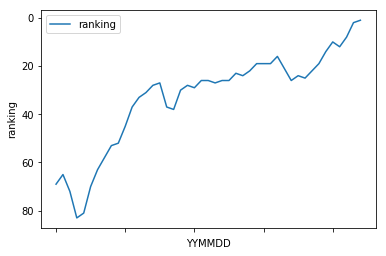

         ranking
count  45.000000
mean   33.022222
std    20.573028
min     1.000000
25%    21.000000
50%    26.000000
75%    38.000000
max    83.000000
         ranking
ranking      1.0


In [39]:
# 메인함수
if __name__ == "__main__":
    # 쿼리문 입력
    query = """ SELECT * FROM zuzak.genie where title = '좋니' and YYMMDD<=170815 order by YYMMDD; """
    
    Chartdf = dbQuery(query)
    Chartdf = dfFilter(Chartdf)
    
    # 쿼리결과 없으면
    if Chartdf.empty:
        print('결과 데이터가 없습니다.')
        
    # 쿼리 결과
    else :
        print(Chartdf)
        
        print('총 차트 진입일 = '+str(len(Chartdf)))
        
        #시각화
        dfPlot(Chartdf)

        #데이터 정보 출력
        print(Chartdf.describe())

        #데이터 피어슨 상관계수
        print(Chartdf.corr(method='pearson'))
        

# 네이버트렌드

In [15]:
#-*- coding: utf-8 -*-
import urllib.request
import json

                ratio
period               
2017-07-02   42.26882
2017-07-03   22.12120
2017-07-04   19.03253
2017-07-05   15.56372
2017-07-06   16.96708
2017-07-07   18.00297
2017-07-08   16.27649
2017-07-09   17.04945
2017-07-10   16.40320
2017-07-11   15.56688
2017-07-12   17.19834
2017-07-13   17.23318
2017-07-14   20.03357
2017-07-15   19.82766
2017-07-16   19.98922
2017-07-17   19.29229
2017-07-18   18.49716
2017-07-19   18.05049
2017-07-20   18.80127
2017-07-21   19.97022
2017-07-22   19.79915
2017-07-23   18.68723
2017-07-24   19.39683
2017-07-25   19.77064
2017-07-26   19.85617
2017-07-27   22.16555
2017-07-28   23.30598
2017-07-29   26.10004
2017-07-30   24.84873
2017-07-31   26.04935
2017-08-01   26.37247
2017-08-02   27.59844
2017-08-03   29.71140
2017-08-04   31.98276
2017-08-05   29.70823
2017-08-06   30.45902
2017-08-07   33.26575
2017-08-08   35.51810
2017-08-09   34.21611
2017-08-10   37.17806
2017-08-11   53.27082
2017-08-12   46.78620
2017-08-13   41.69544
2017-08-14

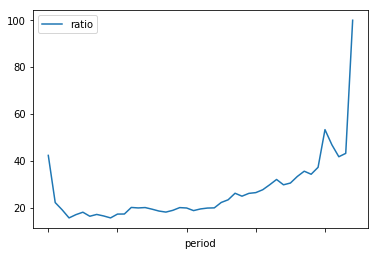

            ratio
count   45.000000
mean    26.867223
std     14.530688
min     15.563720
25%     18.687230
50%     20.033570
75%     30.459020
max    100.000000


In [40]:
def NaverTrend():
    client_id = "_X9iNbtxufWnpoN9n0gx"
    client_secret = "xUdZWWvtJJ"
    url = "https://openapi.naver.com/v1/datalab/search";

    body = """{
            \"startDate\":\"2017-07-02\",
            \"endDate\":\"2017-08-15\",
            \"timeUnit\":\"date\",
            \"keywordGroups\":
                [
                    {
                    \"groupName\":\"좋니\",
                    \"keywords\":
                        [
                        \"좋니\",
                        \"윤종신 좋니\",
                        \"좋니 윤종신\"
                        ]
                    }
                ]
            }""";

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
    else:
        print("Error Code:" + rescode)

        
    # plotting
    naver = response_body
    jsondata = json.loads(naver.decode())
    
    # 검색 데이터 필터링
    tmp = jsondata['results'][0]['data']
    df = pd.DataFrame(tmp)
    df.index = df.period
    del df['period']
    
    return df
    
    # 메인함수
if __name__ == "__main__":
    Naverdf = NaverTrend()
    print(Naverdf)
    print('결과 레코드 수 = '+str(len(Naverdf)))
    Naverdf.plot()
    plt.show()

    #데이터 정보 출력
    print(Naverdf.describe())


# 상관분석

In [41]:
# 데이터프레임 합치기
def MergeData(naver, chart):
    # Naverdf 조정
    naver.rename(columns={'ratio':'naver'}, index={'period':'YYMMDD'},inplace=True)
    naver.index = naver.index.map(lambda x : x[2:4]+x[5:7]+x[8:10])
    naver.index.names = ['YYMMDD']
    df = pd.concat([Chartdf, Naverdf], axis=1, join_axes=[Naverdf.index])
    # ranking 값 뒤집기
    df.ranking = df.ranking.map(lambda x: (101-x))
    return df

In [42]:
if __name__=='__main__':
    df = MergeData(Naverdf, Chartdf)

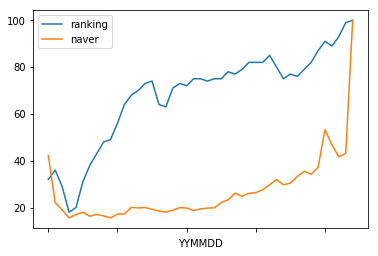

In [43]:
df.plot()
plt.show()

In [44]:
df.corr(method='pearson')

,ranking,naver
ranking,1.000000,0.520835
naver,0.520835,1.000000


In [21]:
df.head()

,ranking,title,artist,naver
YYMMDD,,,,
170701,NaN,NaN,NaN,2.29612
170702,NaN,NaN,NaN,5.69618
170703,NaN,NaN,NaN,4.20540
170704,NaN,NaN,NaN,3.54937
170705,NaN,NaN,NaN,2.87297


# 속성 추출
1. 차트 진입후 5위 이내까지 진입한 일수
2. 해당 곡 아티스트의 다른 곡이 차트에 진입한 일수
3. 차트 진입 후 5위 이내까지 일간 랭킹 상승 평균치
4. 네이버 트렌드와 음원차트의 상관계수
5. and more...